In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.dataset_loader import CoastData
from src.data_processing.patchify import Patchify

## Load data

In [2]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed/"))

# Load the data, all the different stations
data = CoastData(data_path)

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image = filtered_data['train']['images'][0]
mask = filtered_data['train']['masks'][0]

print("Path:", image)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Path: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed/images/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.image.jpg


In [3]:
patchify = Patchify(patch_size=256, stride=128)

patches = patchify.extract_patches(image, mask, skip_background=False)

In [4]:
print("Number of patches:", len(patches))

Number of patches: 15


Rows: 2


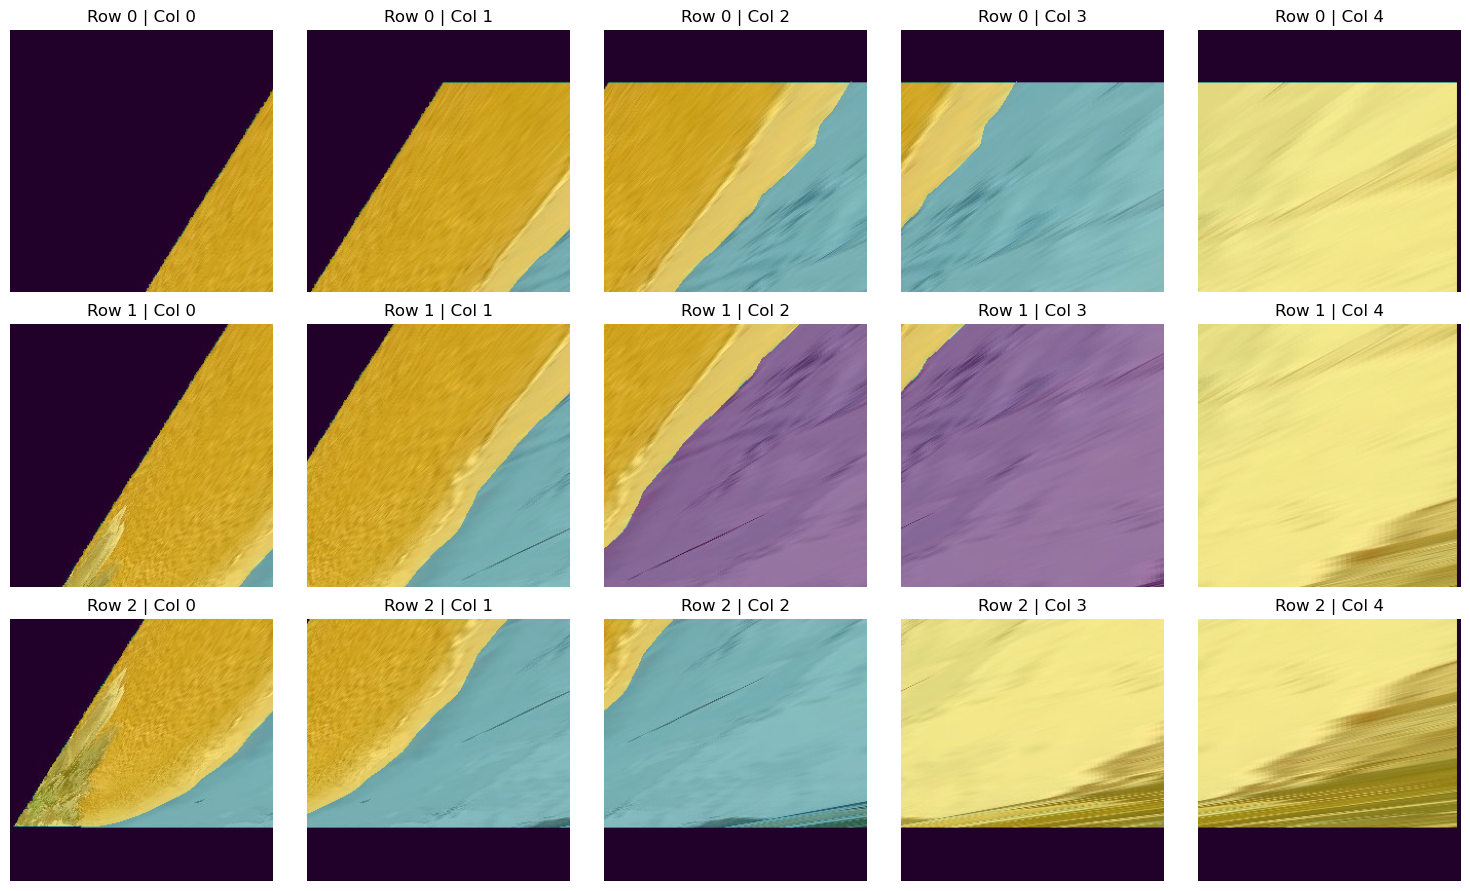

In [5]:
rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Crear subgràfics
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Mostrar cada patch
for i, patch in enumerate(patches):
    ax = axes[i]
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.5)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')

# Ocultar els subgràfics que no s'utilitzen
for i in range(len(patches), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify/')

Extracting patches for train dataset...
Finished extracting patches for train dataset.

Extracting patches for validation dataset...
Finished extracting patches for validation dataset.

Extracting patches for test dataset...
Finished extracting patches for test dataset.

